<a href="https://colab.research.google.com/github/PietroDF/Covid_forecast/blob/master/Covid_trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
import pandas as pd

In [0]:
import matplotlib.pyplot as plt

In [0]:
import scipy.optimize, scipy.stats

In [0]:
import datetime as dt

In [0]:
path_to_txt = '/content/drive/My Drive/Machine Learning/COVID/dpc-covid19-ita-andamento-nazionale.csv'

In [0]:
csv_data = pd.read_csv(path_to_txt)

In [0]:
csv_data.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
18,2020-03-13 17:00:00,ITA,7426,1328,8754,6201,14955,2116,1439,1266,17660,97488
19,2020-03-14 17:00:00,ITA,8372,1518,9890,7860,17750,2795,1966,1441,21157,109170
20,2020-03-15 17:00:00,ITA,9663,1672,11335,9268,20603,2853,2335,1809,24747,124899
21,2020-03-16 17:00:00,ITA,11025,1851,12876,10197,23073,2470,2749,2158,27980,137962
22,2020-03-17 17:00:00,ITA,12894,2060,14954,11108,26062,2989,2941,2503,31506,148657


In [0]:
day_month = [x[0:10] for x in csv_data['data'].tolist()]
new_pos = [x for x in csv_data['nuovi_attualmente_positivi'].tolist()]
tot_pos = [x for x in csv_data['totale_attualmente_positivi'].tolist()]

In [0]:
tot_pos

[221,
 311,
 385,
 588,
 821,
 1049,
 1577,
 1835,
 2263,
 2706,
 3296,
 3916,
 5061,
 6387,
 7985,
 8514,
 10590,
 12839,
 14955,
 17750,
 20603,
 23073,
 26062]

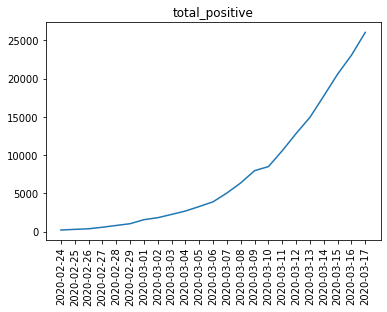

In [0]:
plt.xticks(rotation=90)
plt.title('total_positive')
plt.plot(day_month,tot_pos)

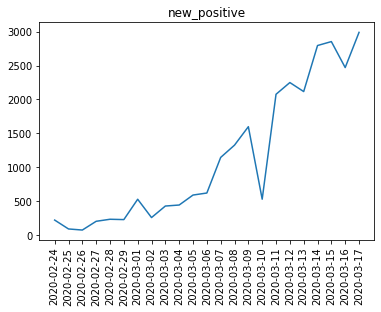

In [0]:
plt.xticks(rotation=90)
plt.title('new_positive')
plt.plot(day_month,new_pos)

In [0]:
normal_dib = scipy.stats.norm(0, 1)

In [0]:
normal_dib.pdf([0,0.1])

array([0.39894228, 0.39695255])

In [0]:
x = np.linspace(-3.5, 3.5,71)

In [0]:
x

array([-3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9, -2.8, -2.7, -2.6, -2.5,
       -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4,
       -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3,
       -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,
        0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,
        2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,
        3.1,  3.2,  3.3,  3.4,  3.5])

In [0]:
y = normal_dib.pdf(x)

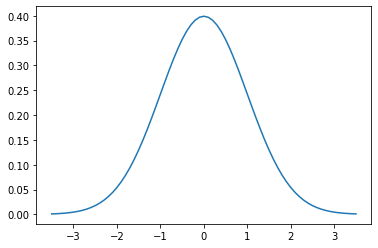

In [0]:
plt.plot(x,y)

In [0]:
past_x = x[:len(tot_pos)]
past_y = y[:len(tot_pos)]

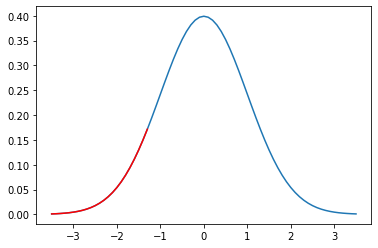

In [0]:
plt.plot(x,y)
plt.plot(past_x,past_y,'-r')

In [0]:
from numpy import linalg as LA

In [0]:
def compute_cost(val_in):

  mu = val_in[0]
  sigma = abs(val_in[1])
  k = val_in[2]

  normal_dib = scipy.stats.norm(mu, sigma)

  x = np.linspace(-3.5, 3.5,71)
  y = normal_dib.pdf(x)*k*1000

  past_x = x[:len(tot_pos)]
  past_y = y[:len(tot_pos)]

  error = new_pos - past_y

  error = LA.norm(error,2)
  return error

best_param = scipy.optimize.minimize(compute_cost, [0,1,1])

In [0]:
best_param

      fun: 1345.429736304091
 hess_inv: array([[0.00251107, 0.00122674, 0.01805961],
       [0.00122674, 0.00063386, 0.00889471],
       [0.01805961, 0.00889471, 0.13127096]])
      jac: array([-0.00050354,  0.00120544,  0.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 486
      nit: 28
     njev: 95
   status: 2
  success: False
        x: array([-0.98550181,  0.85458874,  6.80869018])

In [0]:
mu = best_param.x[0]
sig = abs(best_param.x[1])
k = best_param.x[2]

In [0]:
forecast = scipy.stats.norm(mu, sig).pdf(x)

In [0]:
forecast = forecast*k*1000

In [0]:
num_contagi = int(np.sum(forecast))

In [0]:
first_day = dt.datetime(2020,2,24)
day_list = [first_day + timedelta(days=x) for x in range(len(forecast))]
day_list = [x.strftime("%Y-%m-%d") for x in day_list]

67995


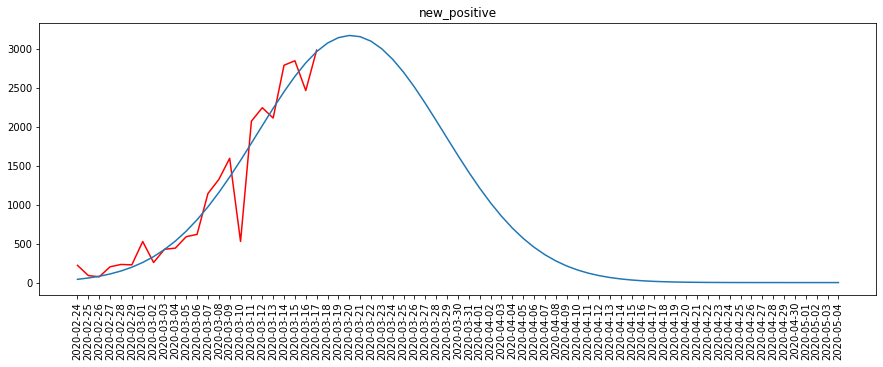

In [0]:
plt.figure(figsize=(15,5))

plt.xticks(rotation=90)
plt.title('new_positive')

plt.plot(day_month, new_pos,'-r')
plt.plot(day_list, forecast)

print(num_contagi)

In [0]:
forecast[0]

41.906590157469644

In [0]:
num_contagi

67995

In [0]:
cum_contagi = np.cumsum(forecast)

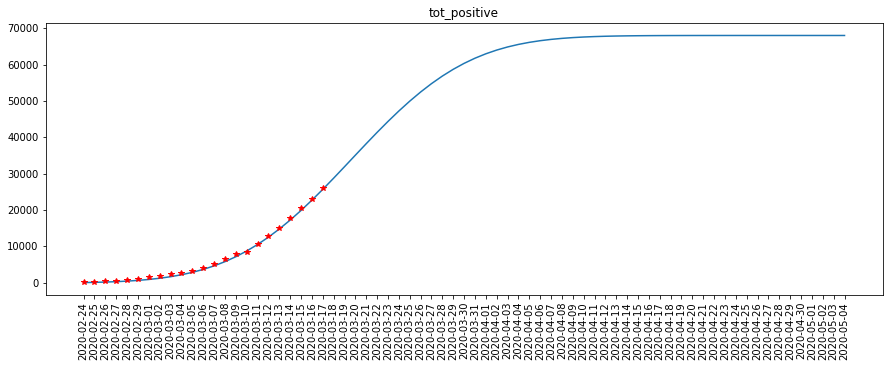

In [0]:
plt.figure(figsize=(15,5))

plt.xticks(rotation=90)
plt.title('tot_positive')

plt.plot(day_list, cum_contagi)
plt.plot(day_month,tot_pos,'*r')

# MonteCarlo simulation

In [0]:
num_elapsed_days = len(new_pos)
tomorrow_new_positives = 0
tomorrow_cum_positives = 0

In [0]:
num_iter = 5

mu = np.zeros((num_iter,1))
sigma = np.zeros((num_iter,1))
k = np.zeros((num_iter,1))

x = np.linspace(-3.5, 3.5,71)

forecast = []
cum_contagi = []

for i in range(num_iter):
  
  mu0 = 0
  sigma0 = 1
  k0 = 1

  mu0 = mu0*(0.5 + np.random.rand())
  sigma0 = sigma0*(0.5 + np.random.rand())
  k0 = k0*(0.5 + np.random.rand())

  best_param = scipy.optimize.minimize(compute_cost, [mu0,sigma0,k0])

  [mu[i],sigma[i],k[i]] = best_param.x

  sigma[i] = abs(sigma[i])

  y = scipy.stats.norm(mu[i], sigma[i]).pdf(x)*k[i]*1000
  cumsum_y = np.cumsum(y)

  tomorrow_new_positives+=y[num_elapsed_days+1]
  tomorrow_cum_positives+=cumsum_y[num_elapsed_days+1]

  forecast.append(y)
  cum_contagi.append(cumsum_y)

tomorrow_new_positives = int(tomorrow_new_positives/num_iter)
tomorrow_cum_positives = int(tomorrow_cum_positives/num_iter)

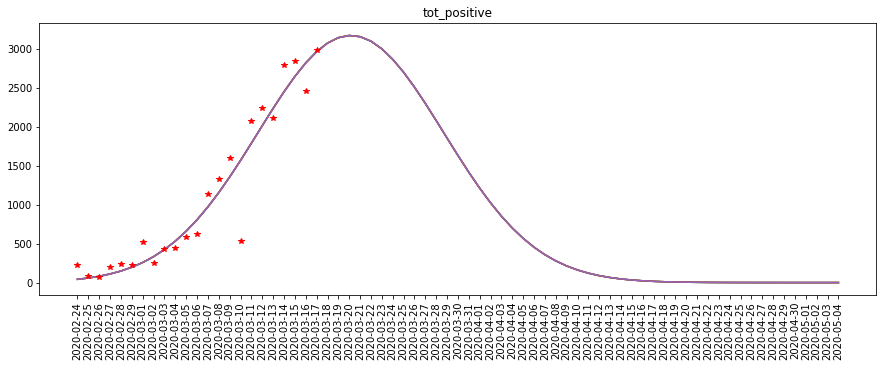

In [0]:
plt.figure(figsize=(15,5))

plt.xticks(rotation=90)
plt.title('tot_positive')

for i in range(num_iter):

  plt.plot(day_list, forecast[i])

plt.plot(new_pos,'*r')

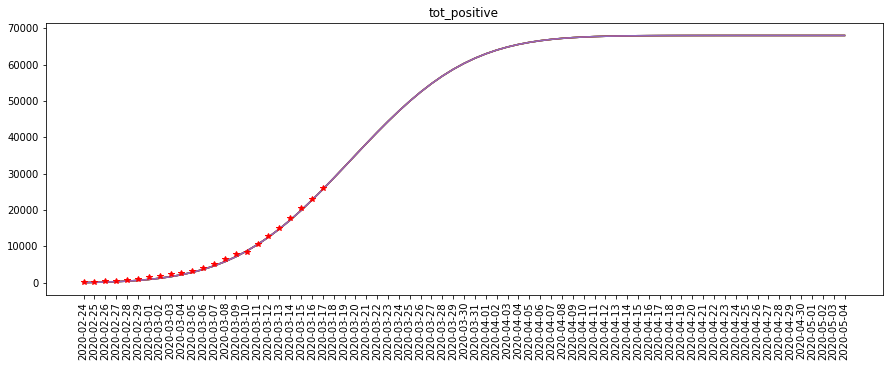

In [0]:
plt.figure(figsize=(15,5))

plt.xticks(rotation=90)
plt.title('tot_positive')

for i in range(num_iter):

  plt.plot(day_list, cum_contagi[i])

plt.plot(tot_pos,'*r')

In [0]:
# Forecast per domani
print('Nuovi casi previsti domani: \t' + str(tomorrow_new_positives))
print('Cumulativo previsto domani: \t' + str(tomorrow_cum_positives))

Nuovi casi previsti domani: 	3150
Cumulativo previsto domani: 	31903
